In [1]:
# Classifying with 0 as benign and 1 as combined attacks 

In [17]:
import time
import csv

import numpy as np
import pandas as pd

In [ ]:
# Reference - https://github.com/fisher85/ml-cybersecurity/blob/master/python-web-attack-detection/web-attack-detection.ipynb

In [26]:
# Change this based on CSV file location
csv_file = 'C:/Users/sinja/OneDrive/Desktop/submit/UNSW-NB15_1.csv'

# Defining column indices to be selected from the CSV file
selected_columns = [0, 2, 4, 7, 8, 9, 10, 11, 12, 22, 23, 48]

# Reading specific columns by their indices (limit of 100k records)
file = pd.read_csv(csv_file, usecols = selected_columns, header = None, nrows = 100000)
    
# Assigning column names 
file.columns = ['Source IP', 'Destination IP', 'Protocol', 'Src - Dst Bytes', 'Dst - Src Bytes',
                'Src - Dst Time to Live', 'Dst - Src Time to Live', 'Source Loss', 'Destination Loss',
                'Mean Flow Packet Size (Source)', 'Mean Flow Packet Size (Destination)', 'Attack Name (Binary)']
 
# Defining the path for the new CSV file 
output_file = 'C:/Users/sinja/OneDrive/Desktop/submit/dataset_2.csv'

# Saving the dataframe to a new CSV file
file.to_csv(output_file, index = False)

In [27]:
file = pd.read_csv('dataset_2.csv')
print(file)

        Source IP Destination IP Protocol  Src - Dst Bytes  Dst - Src Bytes  \
0      59.166.0.0  149.171.126.6      udp              132              164   
1      59.166.0.0  149.171.126.9      udp              528              304   
2      59.166.0.6  149.171.126.7      udp              146              178   
3      59.166.0.5  149.171.126.5      udp              132              164   
4      59.166.0.3  149.171.126.0      udp              146              178   
...           ...            ...      ...              ...              ...   
99995  59.166.0.3  149.171.126.1      tcp            37178             3380   
99996  59.166.0.6  149.171.126.4      tcp             4216             2976   
99997  59.166.0.8  149.171.126.8      tcp             8928              320   
99998  59.166.0.9  149.171.126.9      tcp              320             1888   
99999  59.166.0.2  149.171.126.0      tcp             1580            10168   

       Src - Dst Time to Live  Dst - Src Time to Li

In [28]:
print("File columns:")
print(file.columns)

# Attack Name (Binary) - 0 = Benign & 1 = Attack
print("\nData value counts:")
print(file['Attack Name (Binary)'].value_counts())

File columns:
Index(['Source IP', 'Destination IP', 'Protocol', 'Src - Dst Bytes',
       'Dst - Src Bytes', 'Src - Dst Time to Live', 'Dst - Src Time to Live',
       'Source Loss', 'Destination Loss', 'Mean Flow Packet Size (Source)',
       'Mean Flow Packet Size (Destination)', 'Attack Name (Binary)'],
      dtype='object')

Data value counts:
0    88570
1    11430
Name: Attack Name (Binary), dtype: int64


In [29]:
# Replacing non-numerical values
file.replace('Infinity', -1, inplace = True)

# Replacing NaN and Infinite values with -1
file.replace([np.inf, -np.inf, np.nan], -1, inplace = True)

# Performing one-hot encoding for string columns
string_features = list(file.select_dtypes(include = ['object']).columns)
file = pd.get_dummies(file, columns = string_features, drop_first = True)

In [30]:
# Extracting 'Attack_Label' as 'y'
y = file['Attack Name (Binary)'].values

# Extracting remaining columns as 'x'
x = file.drop(columns = ['Attack Name (Binary)'])

print("Before Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

Before Scaling:

Y Values:
[0 0 0 ... 0 0 0]

X Values:
       Src - Dst Bytes  Dst - Src Bytes  Src - Dst Time to Live  \
0                  132              164                      31   
1                  528              304                      31   
2                  146              178                      31   
3                  132              164                      31   
4                  146              178                      31   
...                ...              ...                     ...   
99995            37178             3380                      31   
99996             4216             2976                      31   
99997             8928              320                      31   
99998              320             1888                      31   
99999             1580            10168                      31   

       Dst - Src Time to Live  Source Loss  Destination Loss  \
0                          29            0                 0   
1          

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fitting and transforming the features using Min-Max Scaling
x = scaler.fit_transform(x)

print("After Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

After Scaling:

Y Values:
[0 0 0 ... 0 0 0]

X Values:
[[1.06348570e-05 1.11904015e-05 1.21568627e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.11291202e-05 2.07431832e-05 1.21568627e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.20664724e-05 1.21456796e-05 1.21568627e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.10098339e-04 2.18349297e-05 1.21568627e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.98594062e-05 1.28826085e-04 1.21568627e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.58704789e-04 6.93804891e-04 1.21568627e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [32]:
# Splitting the dataset by Train-Test Split (70% train set and 30% test set)

from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 42)

print("Y Train:")
print(y_train)
print("\nX Train:")
print(x_train)

print("\nY Test:")
print(y_test)
print("\nX Test:")
print(x_test)

# Converting to Pandas Series
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("\nY Train value counts:")
print(y_train_series.value_counts())
print("\nY Test value counts:")
print(y_test_series.value_counts())

Y Train:
[0 0 0 ... 0 0 0]

X Train:
[[1.20664724e-05 1.21456796e-05 1.21568627e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.58704789e-04 6.93804891e-04 1.21568627e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.06561645e-04 1.64444314e-04 1.21568627e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.41142049e-04 4.23815986e-03 1.21568627e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.96966489e-04 3.53507512e-03 1.21568627e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.02667273e-04 5.60884757e-05 1.21568627e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]

Y Test:
[0 0 0 ... 0 0 0]

X Test:
[[1.20664724e-05 1.21456796e-05 1.21568627e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.20664724e-05 1.21456796e-05 1.21568627e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.20664724e-05 1.21456796e-05 1.21568627e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.20664724e-05 1.214567

In [35]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

import seaborn as sns
import seaborn as sn 

Time consumed to fit model is  1536.594962835312
The best parameter is:
{'max_features': 1, 'n_estimators': 20}
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     26537
           1       0.97      0.94      0.96      3463

    accuracy                           0.99     30000
   macro avg       0.98      0.97      0.98     30000
weighted avg       0.99      0.99      0.99     30000



Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

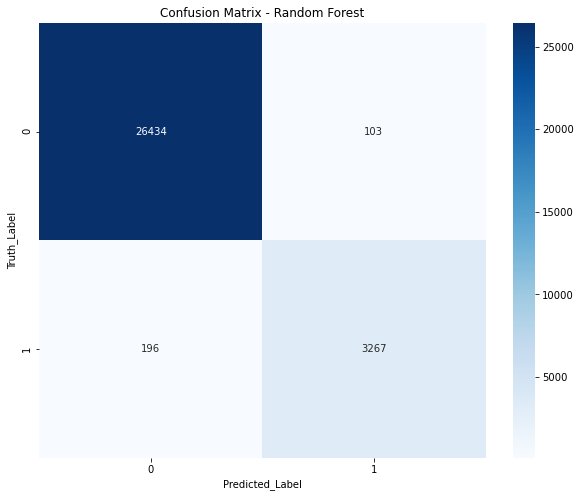

In [36]:
# Random Forest 

# Reference - https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# Defining parameter range
param_grid = dict(max_features = np.arange(1,4,1), 
                  n_estimators = np.arange(10,200,10))

# Parameter Description
# max_features = number of features to consider when looking for the best split
# n_estimators = number of trees in the forest

grid = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)

start = time.time()

# Fitting the model for grid search
grid.fit(x_train, y_train.ravel())

end = time.time()

print("Time consumed to fit model is ", end - start)

print("The best parameter is:")
print(grid.best_params_)

# Predictions on the test set
grid_predictions = grid.predict(x_test)

print(classification_report(y_test.ravel(), grid_predictions))

# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test.ravel(), grid_predictions)
plt.figure(figsize = (10,8))
sn.heatmap(conf_matrix, annot = True, cmap = 'Blues',  fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Random Forest')

Time consumed to fit model is  6497.135479211807
The best parameter is:
{'C': 10, 'gamma': 1, 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     26537
           1       0.94      0.93      0.94      3463

    accuracy                           0.99     30000
   macro avg       0.97      0.96      0.96     30000
weighted avg       0.99      0.99      0.99     30000



Text(0.5, 1.0, 'Confusion Matrix - SVM')

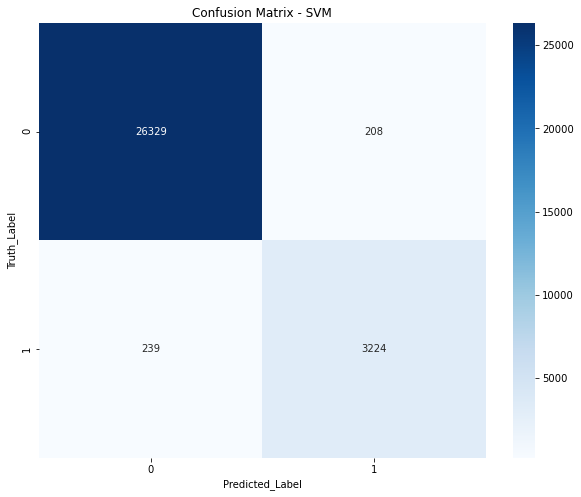

In [37]:
# SVM

# Reference - https://medium.com/swlh/hyperparameter-tuning-of-support-vector-machine-using-gridsearchcv-4d17671d1ed2

from sklearn.svm import SVC

svc = SVC()

# Defining parameter range
param_grid = {'C': [0.1, 1, 10],            
              'gamma': [0.01, 0.1, 1],       
              'kernel': ['rbf', 'poly'],     
             }

# Parameter Description
# C = governs the balance between maximizing the margin and minimizing classification errors
# gamma = influences the shape of the decision boundary

grid = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5)

start = time.time()

# Fitting the model for grid search
grid.fit(x_train, y_train.ravel())

end = time.time()

print("Time consumed to fit model is ", end - start)

print("The best parameter is:")
print(grid.best_params_)

# Predictions on the test set
grid_predictions = grid.predict(x_test)

print(classification_report(y_test.ravel(), grid_predictions))

# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test.ravel(), grid_predictions)
plt.figure(figsize = (10, 8))
sn.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - SVM')

Time consumed to fit model is  2793.4774417877197
Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (400,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     26537
           1       0.97      0.87      0.92      3463

    accuracy                           0.98     30000
   macro avg       0.98      0.93      0.95     30000
weighted avg       0.98      0.98      0.98     30000



Text(0.5, 1.0, 'Confusion Matrix - Vanilla Neural Network')

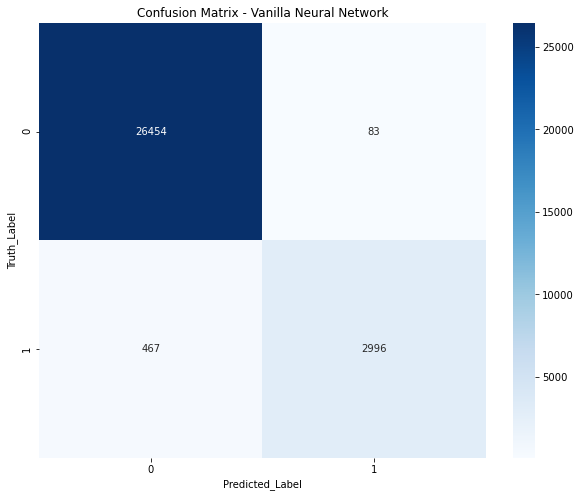

In [38]:
# Vanilla Neural Network 

# Reference - https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn

from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier()

param_grid_2 = {'learning_rate': ['constant','adaptive'], 
                'learning_rate_init': [0.1, 0.5, 1],
                'hidden_layer_sizes': [(100,), (200,), (300,), (400,)],
                'activation': ['relu']}

# Parameter Description
# learning_rate = schedule for weight updates
# learning_rate_init = the initial learning rate used
#                      controls the step-size in updating the weights
#                      only used when solver is ’sgd’ or ‘adam’
# hidden_layer_sizes = the ith element represents the number of neurons in the ith hidden layer
# activation = activation function for the hidden layer

mlp = GridSearchCV(estimator = mlpc, param_grid = param_grid_2, cv = 5)

start_2 = time.time()

# Fitting the model for grid search
mlp.fit(x_train, y_train.ravel())

end_2 = time.time()

print("Time consumed to fit model is ", end_2 - start_2)

print('Best parameters found:\n', mlp.best_params_)

# Predictions on the test set
mlp_predictions = mlp.predict(x_test)

print(classification_report(y_test.ravel(), mlp_predictions))

# Plotting the Confusion Matrix
conf_matrix_2 = confusion_matrix(y_test.ravel(), mlp_predictions)
plt.figure(figsize = (10,8))
sn.heatmap(conf_matrix_2, annot = True, cmap = 'Blues',  fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Vanilla Neural Network')